In [1]:
import numpy as np, matplotlib as mpl, matplotlib.pyplot as plt
import pandas as pd
import pcmdpy_gpu as ppy
from tqdm import tqdm
import seaborn as sns
%matplotlib inline

/n/home01/bcook/.conda/envs/py36/lib/python3.6/site-packages/pysynphot/locations.py:46: UserWarning: PYSYN_CDBS is undefined; functionality will be SEVERELY crippled.
  warnings.warn("PYSYN_CDBS is undefined; functionality will be SEVERELY "
/n/home01/bcook/.conda/envs/py36/lib/python3.6/site-packages/pysynphot/locations.py:329: UserWarning: Extinction files not found in extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


In [2]:
res = ppy.results.ResultsPlotter('results/M31_r1_m9.csv')

In [3]:
f = ppy.instrument.m31_winter_filters()

In [4]:
iso_model = ppy.isochrones.Isochrone_Model(f)

In [5]:
driv = ppy.driver.Driver(iso_model)

Please wait while the GPU states are initialized

In [6]:
data = np.loadtxt('../data/m31/pcmds/m31_bulge_r1.pcmd', unpack=True)

In [7]:
driv.initialize_data(data)

In [8]:
sim_args = {
    'dither': False,
    'mag_system': 'ab',
    'dark_per_sec': 0.0127,
    'sky_noise': [178.1, 103.5],
    'downsample': 5,
    'fixed_seed': False
}

In [9]:
pcmd2, _ = driv.simulate(res.best_model, 512, **sim_args)

In [10]:
driv.loglike(pcmd2)

-1050.248853003522

In [11]:
res.max_logl

-996.2

In [12]:
m = res.best_model.copy()

In [13]:
res.params

['logfeh',
 'logdust',
 'logSFH0',
 'logSFH1',
 'logSFH2',
 'logSFH3',
 'logSFH4',
 'dmod',
 'logNpix']

In [23]:
lls_other = []
for v in tqdm(res.df[res.params[:-1]].values[-1000:]):
    m.set_params(v)
    lls_other.append(driv.loglike(driv.simulate(m, 512, **sim_args)[0]))

100%|██████████| 1000/1000 [12:12<00:00,  1.35it/s]


In [15]:
lls = [driv.loglike(driv.simulate(res.best_model, 512, **sim_args)[0]) for _ in tqdm(range(50))]

100%|██████████| 50/50 [00:24<00:00,  2.08it/s]


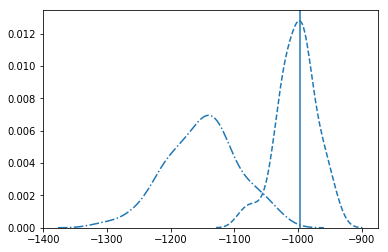

In [18]:
ax = sns.kdeplot(lls)
sns.kdeplot(lls_other, ax=ax)
ax.axvline(x=res.max_logl)

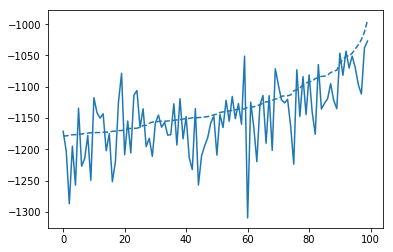

In [22]:
plt.plot(lls_other)
plt.plot(res.df.logl.tail(100).values)